In [1]:
import os
import pandas   as pd
import numpy    as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
os.chdir("E:/DATA SCIENCE/Capstone Project/Win Prediction")

In [3]:
fullraw = pd.read_csv("Win_Prediction_Data.csv")

In [4]:
fullraw

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,18-Mar-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,4-Mar-19,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,28-Feb-19,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,27-Jan-19,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [5]:
fullraw.describe(include = 'object')

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Status Code
count,9982,10061,10061,10061,10061,10061,10061,10061
unique,41,67,2555,25,13,43,278,2
top,Others,Solution 32,27-Jul-18,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1763,1439,15,2693,3360,1166,323,6306


### Missing Value Treatment

In [6]:
fullraw.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

#### Replacing Missing Values with Mode_Value in Client Category

In [7]:
fullraw['Client Category'] = fullraw['Client Category'].fillna(fullraw['Client Category'].mode()[0])

In [8]:
fullraw.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

#### CorrPlot

In [9]:
df = fullraw.apply( lambda x : pd.factorize(x)[0]).corr(method = "pearson", min_periods = 1); df

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
Client Category,1.000000,-0.000288,0.040162,0.415474,-0.058440,0.065936,0.065094,-0.067567,0.066413
Solution Type,-0.000288,1.000000,0.169710,-0.005967,-0.062212,0.104661,0.091017,0.076593,0.094455
Deal Date,0.040162,0.169710,1.000000,0.032783,0.024889,0.228715,0.315075,0.122406,0.018173
Sector,0.415474,-0.005967,0.032783,1.000000,0.026685,0.068515,0.045726,-0.073057,0.030751
Location,-0.058440,-0.062212,0.024889,0.026685,1.000000,0.058452,0.011930,0.025785,0.048104
VP Name,0.065936,0.104661,0.228715,0.068515,0.058452,1.000000,0.386554,0.070132,0.033829
Manager Name,0.065094,0.091017,0.315075,0.045726,0.011930,0.386554,1.000000,0.098620,-0.017289
Deal Cost,-0.067567,0.076593,0.122406,-0.073057,0.025785,0.070132,0.098620,1.000000,-0.202129
Deal Status Code,0.066413,0.094455,0.018173,0.030751,0.048104,0.033829,-0.017289,-0.202129,1.000000


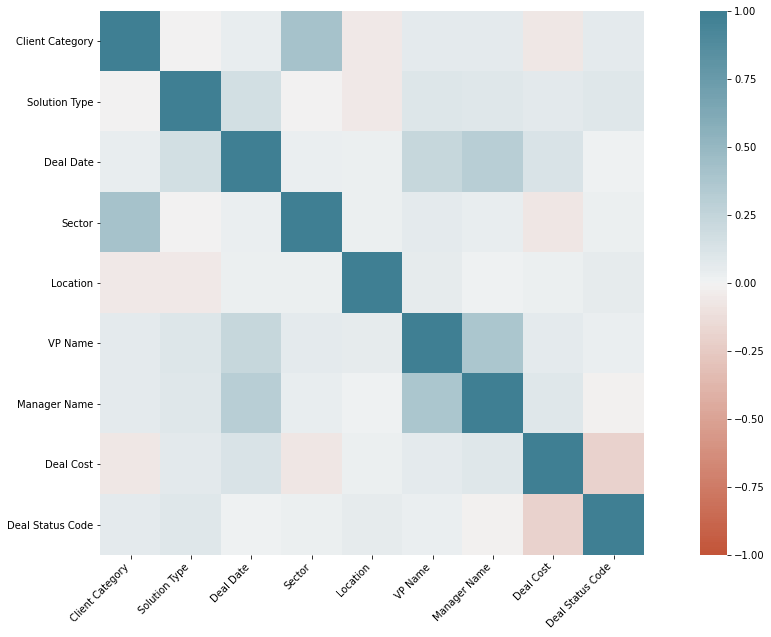

In [10]:
plt.figure (figsize = (20, 10))
ax = sns.heatmap( df, 
                  vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(20, 220, n=200),
                  square=True )
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right');

## Data PreProcessing

#### Deal_Cost Column

<AxesSubplot:xlabel='Deal Cost', ylabel='Count'>

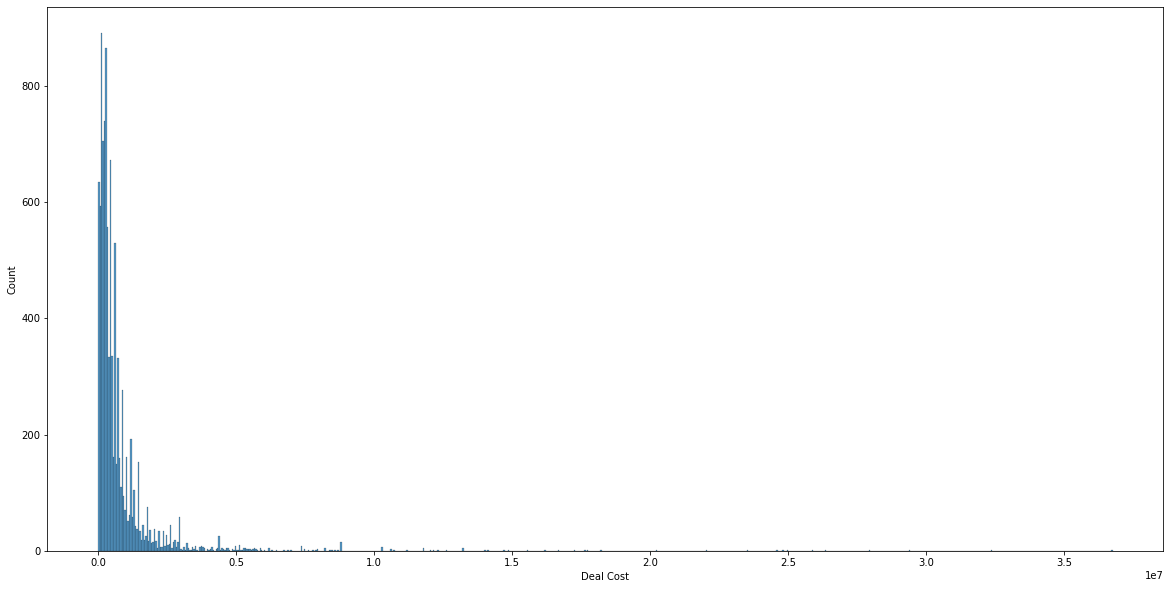

In [11]:
get_ipython().run_line_magic('matplotlib','inline')

plt.figure(figsize = (20,10))
sns.histplot(fullraw['Deal Cost'])

###### The Deal_Cost column is Right_Skewed...

In [12]:
fullraw['Deal Cost'].value_counts()

294117.65     508
588235.29     390
441176.47     377
147058.82     363
0.00          246
             ... 
329117.65       1
101764.71       1
503529.41       1
666176.47       1
3042058.82      1
Name: Deal Cost, Length: 1469, dtype: int64

###### Handling "0" values in Deal_Cost with Median Value

In [13]:
tempmedian = fullraw['Deal Cost'].median(); tempmedian

382352.94

In [14]:
fullraw['Deal Cost'].replace(0.00, tempmedian, inplace = True)

fullraw['Deal Cost'].value_counts()

294117.65      508
588235.29      390
441176.47      377
147058.82      363
382352.94      309
              ... 
36764705.88      1
1046764.71       1
22058823.53      1
29411764.71      1
3042058.82       1
Name: Deal Cost, Length: 1468, dtype: int64

#### Log value of Deal Cost  to normalise the Skewed Data

<AxesSubplot:xlabel='Log Deal Cost', ylabel='Count'>

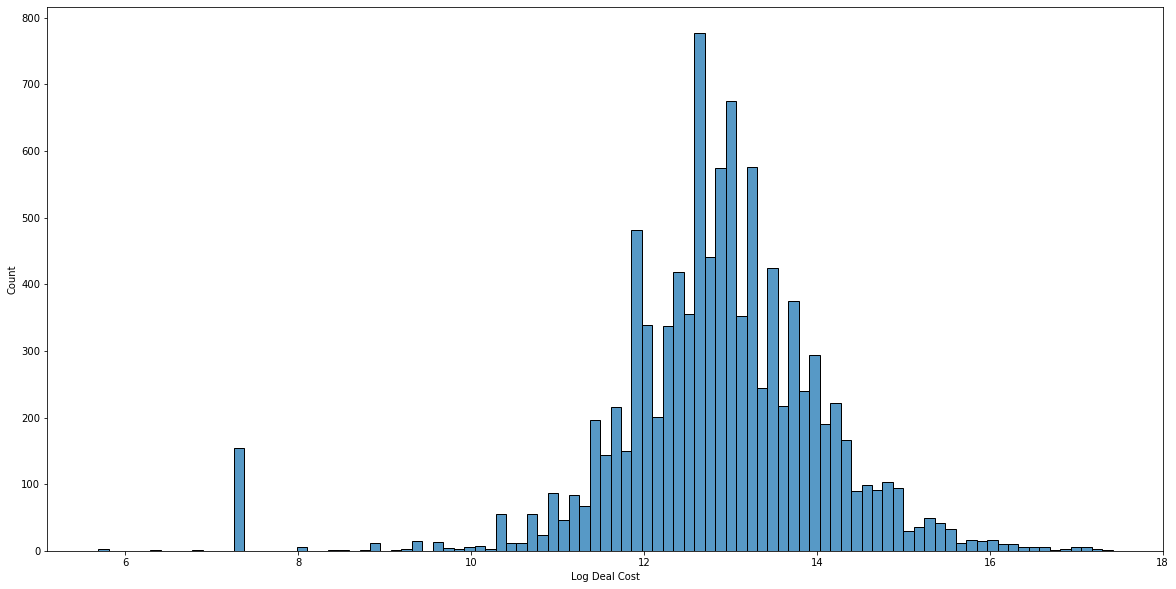

In [15]:
fullraw['Log Deal Cost'] = np.log(fullraw['Deal Cost'])

plt.figure (figsize = (20,10))
sns.histplot (fullraw["Log Deal Cost"])

#### Combine VP Name and Manager Name¶

In [16]:
fullraw['Vp_Manager'] = fullraw["VP Name"] + " " + fullraw["Manager Name"]

#### Dropping Column's from the data, which are not going to assist us in our model

In [17]:
fullraw = fullraw.drop(["Deal Cost"], axis = 1)

fullraw = fullraw.drop(['Deal Date'], axis = 1)

fullraw = fullraw.drop(["VP Name"], axis = 1)

fullraw = fullraw.drop(["Manager Name"], axis = 1)

In [18]:
fullraw

,Client Category,Solution Type,Sector,Location,Deal Status Code,Log Deal Cost,Vp_Manager
0,Telecom,Solution 7,Sector 24,L5,Won,11.918391,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,Won,13.520745,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,Lost,11.002100,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,Lost,11.002100,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,Lost,11.300751,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,Lost,13.284882,Rudraksh Sharma Rudraksh Sharma
10057,Internal,Solution 6,Sector 20,Others,Won,13.563271,Rudraksh Sharma Sharavan Singh
10058,Power ind,Solution 9,Sector 9,L5,Lost,13.284882,Rudraksh Sharma Rudraksh Sharma
10059,Power ind,Solution 62,Sector 9,L5,Won,14.928045,Man Suddeth Cleotilde Biron


## Feature Engineering

#### Recoding Dependant Variable

In [19]:
fullraw['Deal Status Code'] = np.where(fullraw["Deal Status Code"] == "Won", 1, 0)

In [20]:
fullraw['Deal Status Code'].value_counts()

0    6306
1    3755
Name: Deal Status Code, dtype: int64

#### Independant Variables

In [21]:
X = fullraw.drop("Deal Status Code", axis = 1);X

,Client Category,Solution Type,Sector,Location,Log Deal Cost,Vp_Manager
0,Telecom,Solution 7,Sector 24,L5,11.918391,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,13.520745,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,11.002100,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,11.002100,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,11.300751,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,13.284882,Rudraksh Sharma Rudraksh Sharma
10057,Internal,Solution 6,Sector 20,Others,13.563271,Rudraksh Sharma Sharavan Singh
10058,Power ind,Solution 9,Sector 9,L5,13.284882,Rudraksh Sharma Rudraksh Sharma
10059,Power ind,Solution 62,Sector 9,L5,14.928045,Man Suddeth Cleotilde Biron


#### Target Variable

In [22]:
y = fullraw["Deal Status Code"];y

0        1
1        1
2        0
3        0
4        0
        ..
10056    0
10057    1
10058    0
10059    1
10060    0
Name: Deal Status Code, Length: 10061, dtype: int32

### Target Encoding

In [23]:
cols = ['Client Category', 'Solution Type', 'Sector', 'Location', 'VP_Manager']

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoder(BaseEstimator, TransformerMixin):
        
    def __init__(self, cols=None):
        
        if isinstance(cols, str):
            self.cols = [cols]
        else:
            self.cols = cols
            
    def fit(self, X, y):
               
        if self.cols is None:
            self.cols = [col for col in X 
                         if str(X[col].dtype)=='object']

        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        self.maps = dict() 
        for col in self.cols:
            tmap = dict()
            uniques = X[col].unique()
            for unique in uniques:
                tmap[unique] = y[X[col]==unique].mean()
            self.maps[col] = tmap
            
        return self

    def transform(self, X, y=None):
        
        Xo = X.copy()
        for col, tmap in self.maps.items():
            vals = np.full(X.shape[0], np.nan)
            for val, mean_target in tmap.items():
                vals[X[col]==val] = mean_target
            Xo[col] = vals
        return Xo
            
            
    def fit_transform(self, X, y=None):
        
        return self.fit(X, y).transform(X, y)


#### Target Encode the categorical Data

In [25]:
te   = TargetEncoder()
X_te = te.fit_transform(X, y)

X_te.sample(10)

,Client Category,Solution Type,Sector,Location,Log Deal Cost,Vp_Manager
5663,0.482955,0.564976,0.391014,0.336310,15.488641,0.611111
3490,0.353963,0.371429,0.391014,0.419847,12.854099,0.248826
5871,0.339434,0.491979,0.391014,0.419847,13.508026,0.571429
3796,0.342826,0.564976,0.391014,0.367847,12.429216,0.388889
6388,0.316239,0.491979,0.391014,0.419847,12.854099,0.000000
2929,0.342826,0.320866,0.391014,0.336310,12.396936,0.000000
5010,0.342826,0.314103,0.314741,0.419847,12.368592,0.125000
3379,0.370787,0.322176,0.316017,0.419847,12.486375,0.396226
5018,0.522696,0.314103,0.377163,0.478580,12.591735,0.444444
7804,0.353963,0.282087,0.377163,0.402062,13.179522,0.600000


### Sampling

In [26]:
fullraw2 = pd.concat([X_te, y], axis = 1); fullraw2

,Client Category,Solution Type,Sector,Location,Log Deal Cost,Vp_Manager,Deal Status Code
0,0.412844,0.348315,0.377163,0.402062,11.918391,0.515152,1
1,0.412844,0.348315,0.377163,0.402062,13.520745,0.515152,1
2,0.522696,0.322176,0.503234,0.478580,11.002100,0.000000,0
3,0.522696,0.322176,0.503234,0.478580,11.002100,0.000000,0
4,0.522696,0.564976,0.503234,0.478580,11.300751,0.000000,0
...,...,...,...,...,...,...,...
10056,0.424242,0.282087,0.452575,0.402062,13.284882,0.000000,0
10057,0.522696,0.302752,0.503234,0.478580,13.563271,0.555556,1
10058,0.424242,0.282087,0.452575,0.402062,13.284882,0.000000,0
10059,0.424242,0.500000,0.452575,0.402062,14.928045,1.000000,1


In [27]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(fullraw2, train_size = 0.80, random_state = 137)

In [28]:
Train.shape

(8048, 7)

In [29]:
Test.shape

(2013, 7)

#### Sampling into X & Y
##### Dividing each dataset into Independant Variables & Dependant Variables(depvar)

In [30]:
depvar = "Deal Status Code"

In [31]:
TrainX = Train.drop(depvar, axis = 1).copy()

TrainY = Train[depvar].copy()

In [32]:
TrainX.shape

(8048, 6)

In [33]:
TestX = Test.drop(depvar, axis= 1).copy()

TestY = Test[depvar].copy()

In [34]:
TestX.shape

(2013, 6)

In [35]:
TestY

8144    1
2043    0
2803    0
7639    1
9557    0
       ..
9139    0
905     0
6238    0
7623    0
9010    0
Name: Deal Status Code, Length: 2013, dtype: int32

## Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
M_rf1 = RandomForestClassifier(random_state = 777).fit(TrainX, TrainY)

#### Prediction & Validation on Test set

In [38]:
Test_Pred = M_rf1.predict(TestX)

In [39]:
Confu_mat = pd.crosstab(TestY, Test_Pred);Confu_mat

col_0,0,1
Deal Status Code,,
0,1208,50
1,237,518


#### Visualize Confusion_Matrix

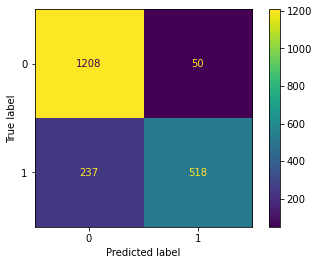

In [40]:
Cm1 = confusion_matrix(TestY, Test_Pred, labels = M_rf1.classes_ )

disp = ConfusionMatrixDisplay( confusion_matrix = Cm1, display_labels = M_rf1.classes_)
disp.plot()

In [41]:
print(classification_report(TestY, Test_Pred))

a = accuracy_score(TestY, Test_Pred)
print("Accuracy Score:", a)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1258
           1       0.91      0.69      0.78       755

    accuracy                           0.86      2013
   macro avg       0.87      0.82      0.84      2013
weighted avg       0.86      0.86      0.85      2013

Accuracy Score: 0.8574267262791853


#### ROC_ AUC Score

In [42]:
dt_score = M_rf1.predict_proba(TrainX)
dt_score = dt_score[ :, 1]

In [43]:
M_rf1.score(TrainX, TrainY)

0.9970178926441352

In [44]:
r = roc_auc_score(TrainY, dt_score)
print('ROC_AUC Score:', r)

ROC_AUC Score: 0.9999254490227153


#### Plot ROC_Curve

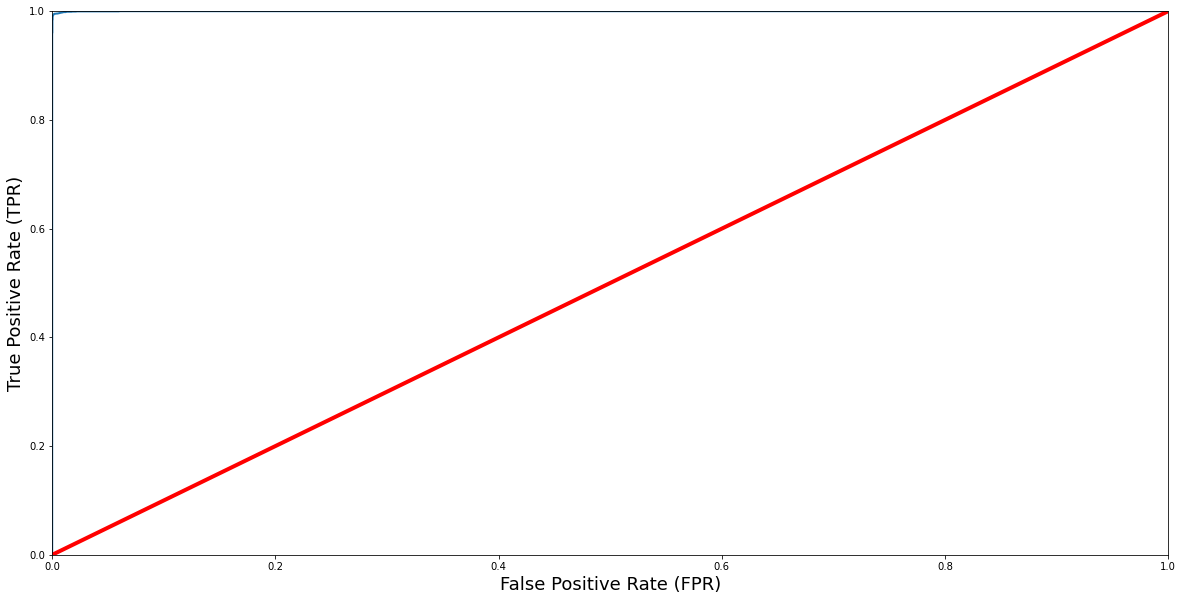

In [45]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(TrainY, dt_score)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=18)
    plt.ylabel('True Positive Rate (TPR)', fontsize=18)

plt.figure (figsize = (20,10))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

#### True Loss

In [46]:
report = TestY.copy()
report = pd.DataFrame(report)

report["Prediction"]= Test_Pred
report["Deal Cost"] = np.exp(TestX["Log Deal Cost"])


True_Loss = report[(report['Deal Status Code'] == 1) & (report['Prediction'] == 0)].sum()
True_Loss['Deal Cost']

153437941.31

### Variable Importance

In [47]:
Var_imp_df = pd.concat([pd.DataFrame(M_rf1.feature_importances_), pd.DataFrame(TrainX.columns)], axis = 1)

In [48]:
Var_imp_df.columns = ["Value", "Variable_Name"]
Var_imp_df.sort_values("Value", ascending = False, inplace = True);Var_imp_df

,Value,Variable_Name
5,0.346597,Vp_Manager
4,0.262611,Log Deal Cost
1,0.133675,Solution Type
0,0.105477,Client Category
2,0.088032,Sector
3,0.063608,Location


In [49]:
Var_imp_df.to_csv("Var_imp_df2.csv", index = False)

### Visualization

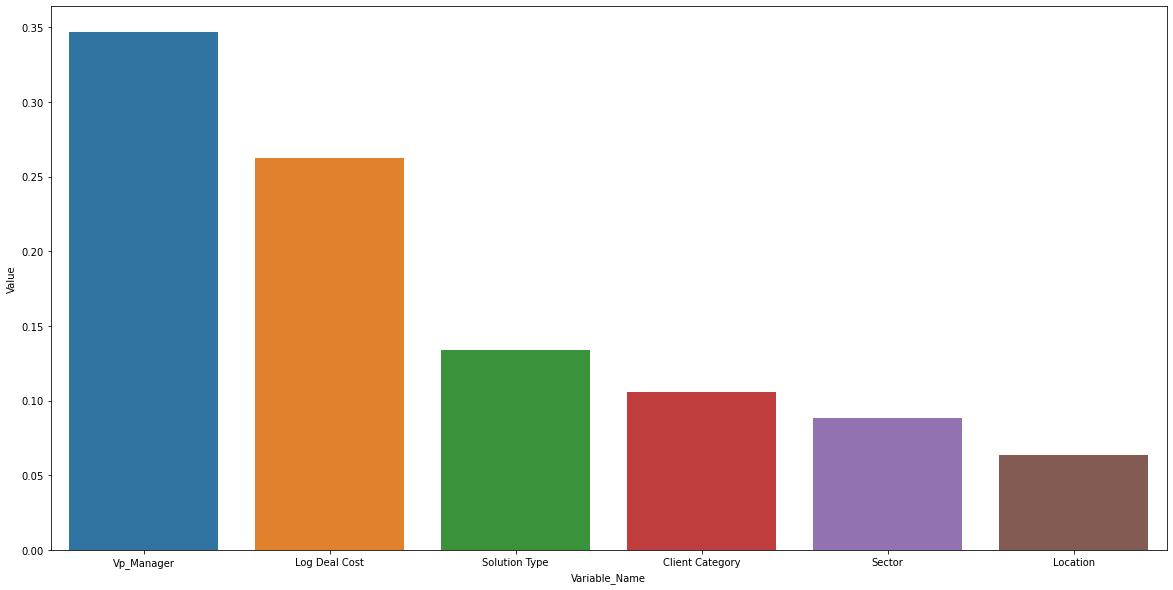

In [50]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 0)
plot= sns.barplot(x = "Variable_Name", y = "Value", data = Var_imp_df)

#### RF_Model with Tuning Parameters

In [51]:
M_rf2 = RandomForestClassifier( random_state = 143, n_estimators = 25,
                                max_features = 5, min_samples_leaf = 500)

In [52]:
M_rf2 = M_rf2.fit(TrainX, TrainY)

#### Prediction & Validation on Test set

In [53]:
Test_Pred2 = M_rf2.predict(TestX)

In [54]:
Confu_mat2 = pd.crosstab(TestY, Test_Pred2);Confu_mat2

col_0,0,1
Deal Status Code,,
0,1091,167
1,388,367


#### Visualize Confusion_Matrix

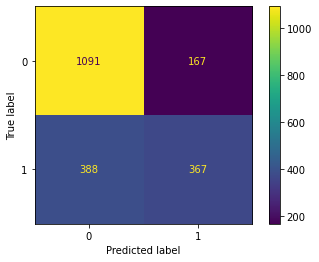

In [55]:
Cm2 = confusion_matrix(TestY, Test_Pred2, labels = M_rf2.classes_ )

disp = ConfusionMatrixDisplay( confusion_matrix = Cm2, display_labels = M_rf2.classes_)
disp.plot()

### RandomForest Grid Searching

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
my_para_grid = {"n_estimators"     : [25, 50, 75],
                "max_features"     : [5, 7, 9],
                "min_samples_leaf" : [100, 200] }

Grid_search_Model(Gsm)

In [58]:
Gsm = GridSearchCV(estimator  = RandomForestClassifier(random_state = 13),
                   param_grid = my_para_grid,
                   scoring    = "accuracy",
                   cv         = 3).fit(TrainX, TrainY)

#### Prediction & Validation on Test set

In [59]:
M_Val_df = pd.DataFrame.from_dict(Gsm.cv_results_)

In [60]:
Rf_Final = RandomForestClassifier(random_state = 127, n_estimators   = 50,
                                  max_features = 5, min_samples_leaf = 100).fit(TrainX, TrainY)

In [61]:
Tp_Final = Rf_Final.predict(TestX)

In [62]:
Cm_final = pd.crosstab(TestY, Tp_Final);Cm_final

col_0,0,1
Deal Status Code,,
0,1096,162
1,353,402


#### Visualize Confusion_Matrix

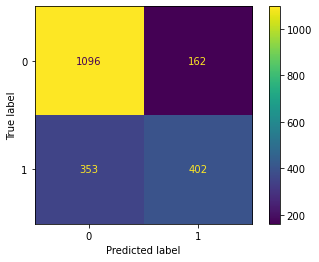

In [63]:
Cm = confusion_matrix(TestY, Tp_Final, labels = Rf_Final.classes_ )

disp = ConfusionMatrixDisplay( confusion_matrix = Cm, display_labels = Rf_Final.classes_)
disp.plot()

In [64]:
print(classification_report(TestY, Tp_Final))

a = accuracy_score(TestY, Tp_Final)
print("Accuracy Score:", a)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1258
           1       0.71      0.53      0.61       755

    accuracy                           0.74      2013
   macro avg       0.73      0.70      0.71      2013
weighted avg       0.74      0.74      0.73      2013

Accuracy Score: 0.7441629408842524


#### ROC_ AUC Score

In [65]:
dt_score = Rf_Final.predict_proba(TrainX)
dt_score = dt_score[ :, 1]

In [66]:
Rf_Final.score(TrainX, TrainY)

0.7599403578528827

In [67]:
r = roc_auc_score(TrainY, dt_score)
print('ROC_AUC Score:', r)

ROC_AUC Score: 0.8293553222398309


#### Plot ROC_Curve

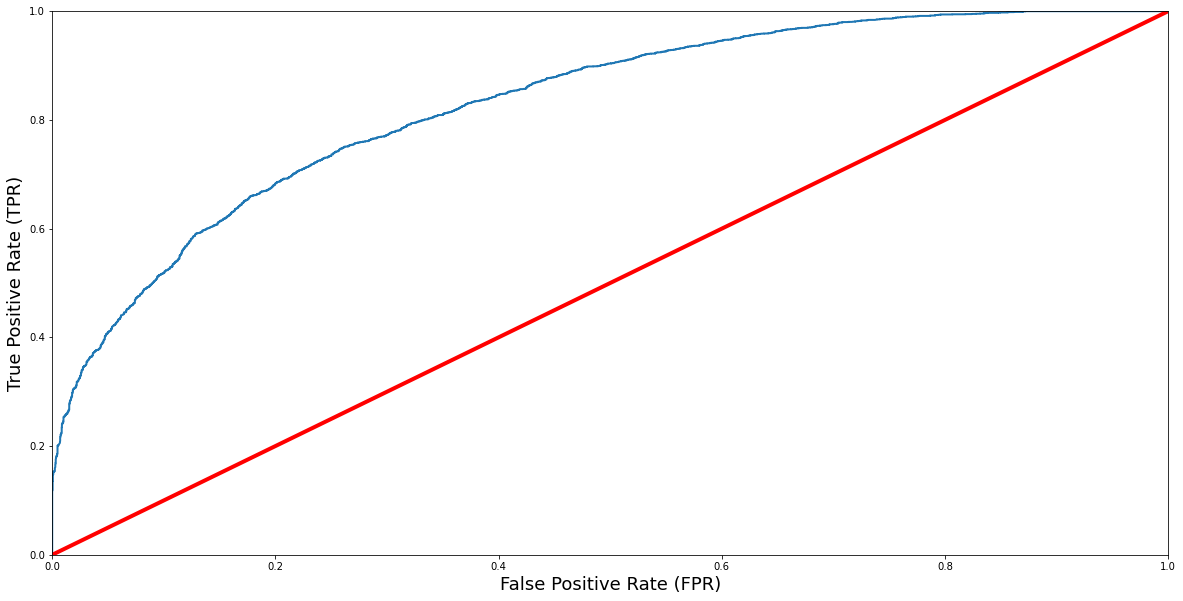

In [68]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(TrainY, dt_score)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=18)
    plt.ylabel('True Positive Rate (TPR)', fontsize=18)

plt.figure (figsize = (20,10))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

#### True Loss

In [69]:
report = TestY.copy()
report = pd.DataFrame(report)

report["Prediction"]= Tp_Final
report["Deal Cost"] = np.exp(TestX["Log Deal Cost"])


True_Loss = report[(report['Deal Status Code'] == 1) & (report['Prediction'] == 0)].sum()
True_Loss['Deal Cost']

254671470.84